<a href="https://colab.research.google.com/github/DarknessSpectre/Labs/blob/main/%D0%A1%D1%80%D0%B0%D0%B2%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BA%D0%BE%D0%BD%D1%81%D0%BF%D0%B5%D0%BA%D1%82%D0%BE%D0%B22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

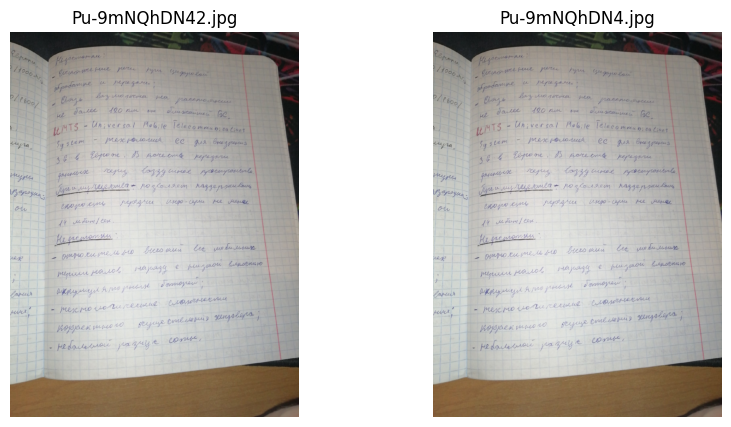

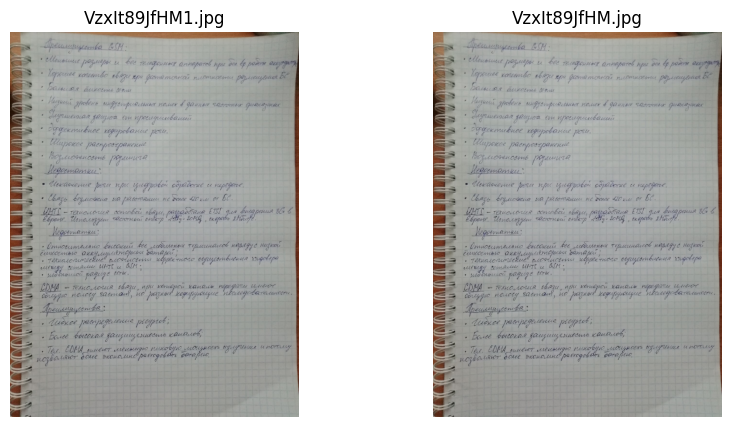

In [ ]:
import os
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt

# Задаем путь к папке с фотографиями конспектов студентов
folder_path = "/content/sample_data/cons"

# Получаем список файлов в папке
image_files = os.listdir(folder_path)

# Создаем функцию для сравнения изображений
def compare_images(img1, img2):
    # Загружаем изображения с помощью OpenCV
    image1 = cv2.imread(img1)
    image2 = cv2.imread(img2)

    # Приводим изображения к одному размеру (например, 200x200 пикселей)
    image1 = cv2.resize(image1, (200, 200))
    image2 = cv2.resize(image2, (200, 200))

    # Преобразуем изображения в оттенки серого
    gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

    # Вычисляем структурное сходство (SSIM) между изображениями
    similarity = ssim(gray_image1, gray_image2)

    return similarity

# Создаем словарь для хранения совпадений
matches = {}

# Сравниваем каждую пару изображений
for i in range(len(image_files)):
    for j in range(i + 1, len(image_files)):
        img1_path = os.path.join(folder_path, image_files[i])
        img2_path = os.path.join(folder_path, image_files[j])

        similarity = compare_images(img1_path, img2_path)

        # Если структурное сходство больше определенного порога, считаем их совпадающими
        if similarity > 0.8:
            if image_files[i] not in matches:
                matches[image_files[i]] = [image_files[j]]
            else:
                matches[image_files[i]].append(image_files[j])

# Выводим результаты
for key, values in matches.items():
    for value in values:
        img1_path = os.path.join(folder_path, key)
        img2_path = os.path.join(folder_path, value)

        img1 = cv2.imread(img1_path)
        img2 = cv2.imread(img2_path)

        # Преобразовываем BGR изображение в RGB для правильного отображения в matplotlib
        img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
        img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

        # Отображаем изображения рядом
        plt.figure(figsize=(10,5))
        plt.subplot(1, 2, 1)
        plt.imshow(img1)
        plt.title(key)
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(img2)
        plt.title(value)
        plt.axis('off')

        plt.show()

In [ ]:
# Создаем переменные для метрик
total_comparisons = len(image_files) * (len(image_files) - 1) // 2  # Общее количество сравнений
successful_comparisons = len(matches)  # Количество успешных сравнений (совпадений)

# Вычисляем процент успешных сравнений
success_rate = (successful_comparisons / total_comparisons) * 100

# Выводим метрики эффективности
print(f"Общее количество сравнений: {total_comparisons}")
print(f"Количество успешных сравнений (совпадений): {successful_comparisons}")
print(f"Процент успешных сравнений: {success_rate:.2f}%")

Общее количество сравнений: 153
Количество успешных сравнений (совпадений): 2
Процент успешных сравнений: 1.31%
